In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def pos(x):
    
    y = x.copy()
    y[x > 0] = x[x > 0]
    y[x <=0] = 0
    
    return y

In [11]:
def gamma(x):
    a =   pos(x + 2)**3
    b = 4*pos(x + 1)**3
    c = 6*pos(x)**3
    d = 4*pos(x - 1)**3
    e =   pos(x - 2)**3

    f = 0.25 * (a - b + c - d + e)

    return f

In [12]:
def final_basis_normal(i, x, h, N, x_0):
    
    if (0 <= i <= N-1):
        a =   pos((x-x_0)/h - (i - 2))**3
        b = 4*pos((x-x_0)/h - (i - 1))**3
        c = 6*pos((x-x_0)/h - (i - 0))**3
        d = 4*pos((x-x_0)/h - (i + 1))**3
        e =   pos((x-x_0)/h - (i + 2))**3

        f = 0.25 * (a - b + c - d + e)

        if i == 0:
            f += pos(1 - (x - x_0)/h)**3/4
        
        if i == (N - 1):
            f += pos((x - x_0)/h - (N-2))**3/4
        
        f[x < x_0] = 0
        
    return f

In [14]:
x, dx = np.linspace(-6, 6, 10_000, retstep=True)
y = gamma(x)

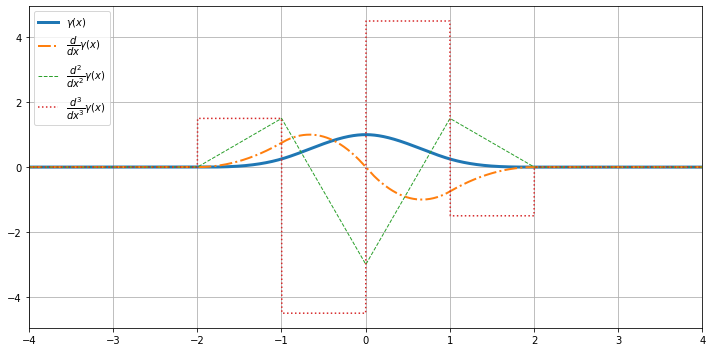

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, y, lw=3)
ax.plot(x[1:], np.diff(y, n=1)/dx, ls="-.", lw=2)
ax.plot(x[2:], np.diff(y, n=2)/dx**2, ls="--", lw=1)
ax.plot(x[3:], np.diff(y, n=3)/dx**3, ls=":")

ax.legend([r"$\gamma(x)$", 
           r"$ \dfrac{d}{dx} \gamma(x)$",
          r"$ \dfrac{d^2}{dx^2} \gamma(x)$",
          r"$ \dfrac{d^3}{dx^3} \gamma(x)$"], loc="upper left", fontsize=10)

ax.grid()
ax.set_xlim([-4, 4])
fig.tight_layout()
plt.show()

In [16]:
#fig.savefig("../images/cubic_compact_support_basis")

# All basis

In [25]:
x0 = -3
xN = 5
N = 11

X, h = np.linspace(x0, xN, N, retstep=True)
x = np.linspace(x0, xN, 1_000)

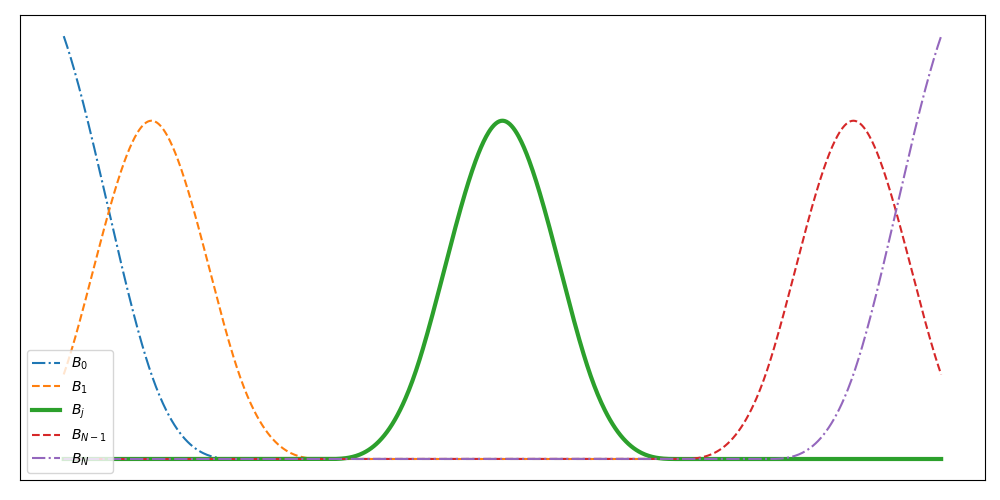

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

b0 = final_basis_normal(0, x, h, N, x0)
b1 = final_basis_normal(1, x, h, N, x0)

bj = final_basis_normal(5, x, h, N, x0)

bN_1 = final_basis_normal(N-2, x, h, N, x0)
bN = final_basis_normal(N-1, x, h, N, x0)

ax.plot(x, b0, ls="-.")
ax.plot(x, b1, ls="--")
ax.plot(x, bj, lw=3)
ax.plot(x, bN_1, ls="--")
ax.plot(x, bN, ls="-.")


ax.legend(["$B_{0}$", "$B_{1}$", "$B_{j}$", "$B_{N-1}$", "$B_{N}$"], loc="lower left")
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
fig.tight_layout()
plt.show()

In [27]:
#fig.savefig("../images/all_cubic_compact_support_basis")

# 2D basis

In [44]:
x0 = -3
xN = 3
N = 8

X, h = np.linspace(x0, xN, N, retstep=True)
x = np.linspace(x0, xN, 1_000)

In [45]:
IX, IY = np.meshgrid(X, X, indexing="ij")

In [46]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

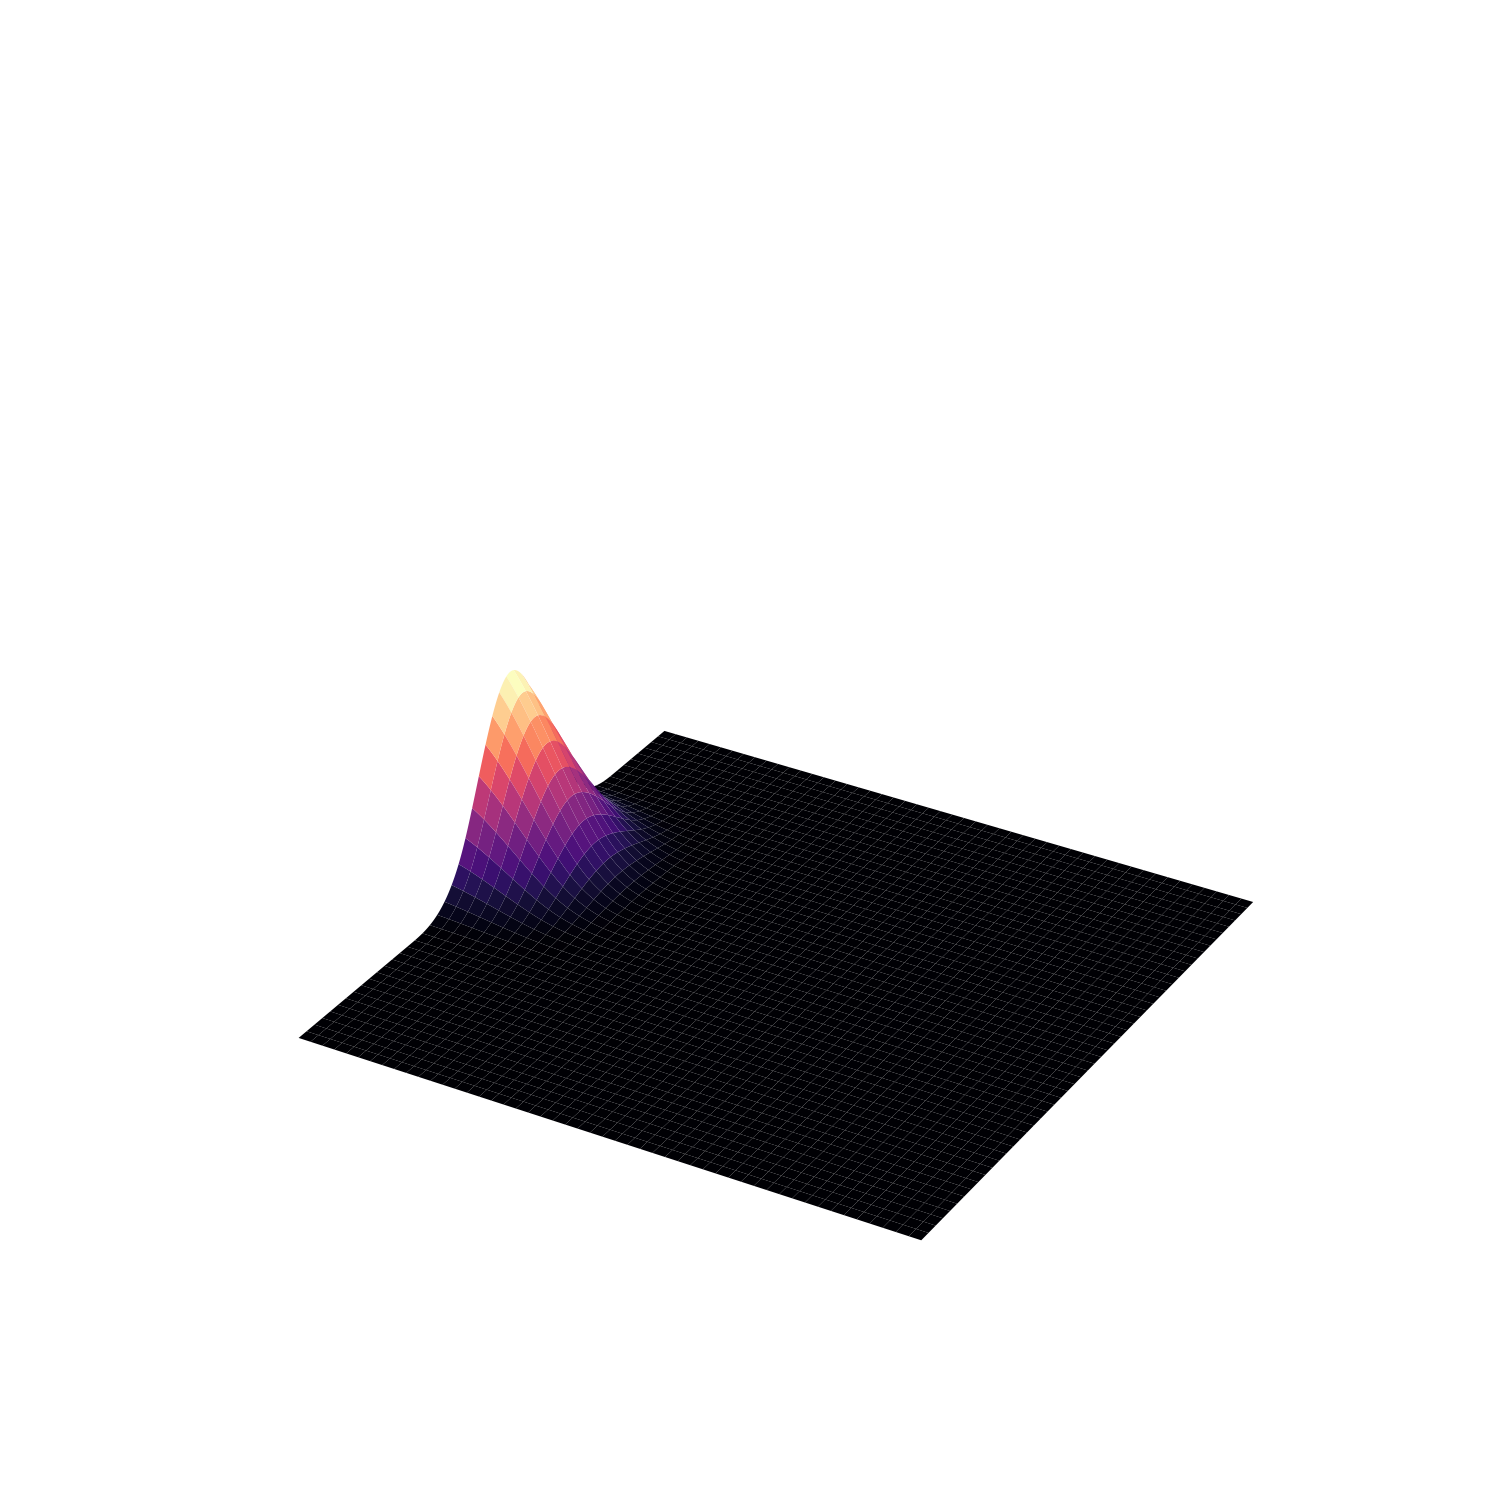

In [101]:
%matplotlib widget
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')

b43 = np.outer(final_basis_normal(4, x, h, N, x0),
              final_basis_normal(3, x, h, N, x0))

b00 = np.outer(final_basis_normal(0, x, h, N, x0),
              final_basis_normal(0, x, h, N, x0))

b00 = np.outer(final_basis_normal(0, x, h, N, x0),
              final_basis_normal(0, x, h, N, x0))

b04 = np.outer(final_basis_normal(0, x, h, N, x0),
              final_basis_normal(4, x, h, N, x0))

b46 = np.outer(final_basis_normal(4, x, h, N, x0),
              final_basis_normal(6, x, h, N, x0))


ax.plot_surface(xx, yy, b04, cmap='magma')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])

ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')

plt.show()

In [102]:
fig.savefig("../images/two_dimensional_basis_1", dpi=200, transparent=True, )